# Support Vector Regressor

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
import time

In [13]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)
X,y

(array([[-0.37197163, -0.27824282],
        [-0.17199021,  0.68897556],
        [ 0.7902546 , -0.00997818],
        ...,
        [-0.02756931, -0.48657488],
        [ 0.17177227,  1.53573809],
        [-1.59629541, -0.52319862]]),
 array([-3.73285531e+01,  1.39132704e+01,  5.59647485e+01, -8.07856311e+01,
        -6.55774623e+01,  2.44347040e+01, -3.68683453e+01,  1.30118387e+02,
        -6.67976956e+01,  5.45407364e+01,  8.06661970e+01, -9.25873162e+01,
         6.08241702e+01, -1.10179527e+02, -1.09867578e+02, -7.76081044e+01,
        -1.40691685e+02, -1.49898979e+02, -1.62170039e+00, -8.44423894e+01,
        -4.38162508e+00, -1.01428025e+02,  3.02530358e+01,  3.11146612e+01,
        -8.22698849e+00,  8.18749492e+00,  1.07274977e+02,  8.99261006e+01,
         2.64566485e+01, -7.46707815e+01,  1.54786804e+01, -2.03586375e+02,
         9.91173614e+00,  3.65009209e+01,  3.06142670e+01, -3.57073314e+01,
         5.99666977e+01,  2.42949940e+01, -4.52155937e+01,  1.30599541e+01,
        -

In [14]:
pd.DataFrame(X)[0]

0     -0.371972
1     -0.171990
2      0.790255
3     -2.032276
4     -1.044781
         ...   
995   -1.352579
996    0.350129
997   -0.027569
998    0.171772
999   -1.596295
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

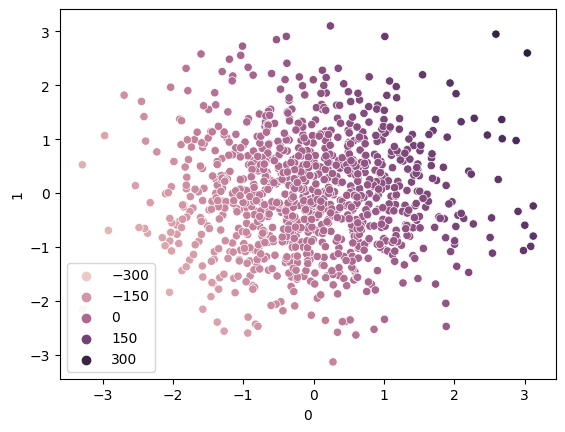

In [15]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [17]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9987402732192245


### Hyperparameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV
st = time.time()
params = {
    'kernel':['linear'],
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'epsilon':[0.1,0.2,0.3]
}
gridcv = GridSearchCV(SVR(),param_grid=params,cv=5,scoring='neg_mean_squared_error',verbose=3,refit=True)
gridcv.fit(X_train,y_train)
et = time.time()
print('Execution time:',et-st)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1340.707 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1281.187 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1747.941 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1756.185 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1467.057 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1340.707 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1281.187 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1747.941 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1756.185 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1467.057 total time=   0.0

In [14]:
gridcv.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [15]:
y_pred_gridcv = gridcv.predict(X_test)
print(r2_score(y_test,y_pred_gridcv))

0.9911520597145277
